<a href="https://colab.research.google.com/github/JCMR-Andrade/Main/blob/main/Script%20CLUSTERS%20V_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Conheça o Colab</h1>
</div>

<div class="markdown-google-sans">
  <h2>&#40;Novidade&#41; Teste a API Gemini</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


In [ ]:
!pip install pingouin

In [2]:
#%% Importando os pacotes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
import scipy.stats as stats
from scipy.stats import zscore
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import pingouin as pg
import plotly.express as px
import plotly.io as pio

In [ ]:
dados = pd.read_excel('Planilha_Rex_Jun_Teste.xlsx')
dados

In [ ]:
dados_t = dados.T
dados_t

In [ ]:
print(dados)

In [62]:
dados.columns = ['Janeiro_23',
                 'Fevereiro_23',
                 'Março_23',
                 'Abril_23',
                 'Maio_23',
                 'Junho_23',
                 'Julho_23',
                 'Agosto_23',
                 'Setembro_23',
                 'Outubro_23',
                 'Novembro_23',
                 'Dezembro_23',
                 'Janeiro_24',
                 'Fevereiro_24',
                 'Março_24',
                 'Abril_24',
                 'Maio_24',
                 'Junho_24']


In [ ]:
#%% Gráfico 3D das observações

fig = px.scatter_3d(dados,
                    x='Janeiro_23',
                    y='Junho_23',
                    z='Dezembro_23',
                    text=dados.index)
fig.show()

In [64]:
# Aplicando o procedimento de ZScore
dados_pad = dados.apply(zscore, ddof=1)

In [ ]:
# Visualizando o resultado do procedimento na média e desvio padrão
print(round(dados_pad.mean(), 2))
print(round(dados_pad.std(), 2))

In [ ]:
#%% Boxplot com as três variáveis originais

plt.figure(figsize=(10,7))
sns.boxplot(x='variable', y='value', data=pd.melt(dados))
plt.ylabel('Valores', fontsize=16)
plt.xlabel('Variáveis', fontsize=16)
plt.show()

In [67]:
dist_eucl = pdist(dados_pad, metric='euclidean')

In [ ]:
plt.figure(figsize=(16,8))
dend_sing = sch.linkage(dados, method = 'complete', metric = 'euclidean')
dendrogram_s = sch.dendrogram(dend_sing, color_threshold = 4.5, labels = list(dados.index))
plt.title('Dendrograma', fontsize=16)
plt.xlabel('Pessoas', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 4.5, color = 'red', linestyle = '--')
plt.show()

In [77]:
# A medida de distância e o método de encadeamento são mantidos

cluster_comp = AgglomerativeClustering(n_clusters = 4, metric = 'euclidean', linkage = 'complete')
indica_cluster_comp = cluster_comp.fit_predict(dados)
dados['cluster_complete'] = indica_cluster_comp
dados['cluster_complete'] = dados['cluster_complete'].astype('category')



In [ ]:
# Coeficientes do esquema hierárquico de aglomeração (complete)
coef_complete = [y[1] for y in dendrogram_s['dcoord']]
print(coef_complete)


In [ ]:
#%% Cluster Não Hierárquico K-means

# Considerando que identificamos 3 possíveis clusters na análise hierárquica

kmeans = KMeans(n_clusters=4, init='random', random_state=100).fit(dados)

# Gerando a variável para identificarmos os clusters gerados

kmeans_clusters = kmeans.labels_
dados['cluster_kmeans'] = kmeans_clusters
dados['cluster_kmeans'] = dados['cluster_kmeans'].astype('category')
dados.columns

In [123]:
dados_press = dados.reset_index()
d = dados_press.T
d.columns = ['TABACARIA ESPECIAL',
             'TABACARIA ORDINÁRIA',
             'ALCOOLICO',
             'NÃO ALCOOLICOS',
             'FOOD SERVICE',
             'BOMBONIERE',
             'SORVETES',
             'SNACKS E BISCOITOS APERITIVOS',
             'OUTRAS CATEGORIAS']
d2 = d.T
d2.drop(columns='index', inplace=True)
d2 = d2.to_excel('Planilha_Rex_Jun_Teste_Clusters.xlsx')

In [ ]:
#%% Identificando as coordenadas centroides dos clusters finais

cent_finais = pd.DataFrame(kmeans.cluster_centers_)
cent_finais.columns = dados.columns
cent_finais.index.name = 'cluster'
cent_finais

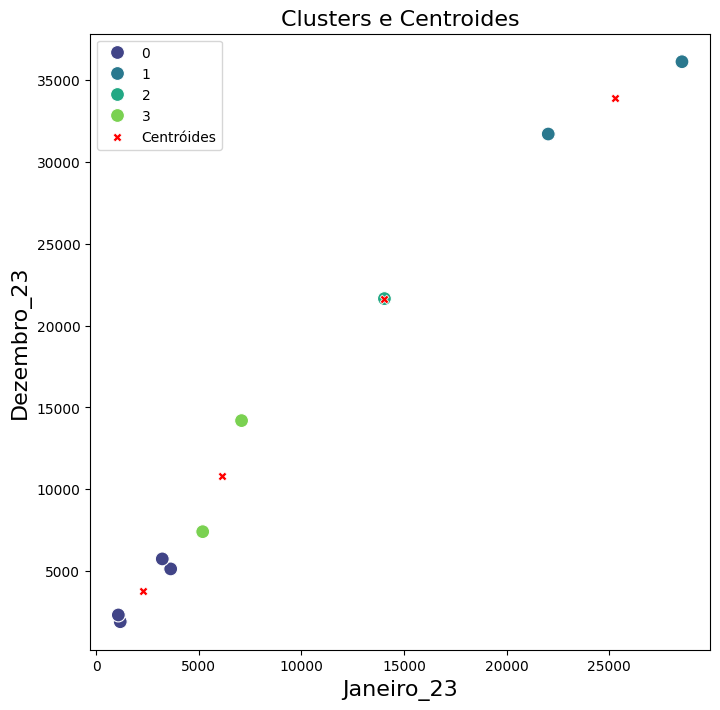

In [96]:
#%% Plotando as observações e seus centroides dos clusters

plt.figure(figsize=(8,8))
sns.scatterplot(data=dados, x='Janeiro_23', y='Dezembro_23', hue='cluster_kmeans', palette='viridis', s=100)
sns.scatterplot(data=cent_finais, x='Janeiro_23', y='Dezembro_23', c = 'red', label = 'Centróides', marker="X", s = 40)
plt.title('Clusters e Centroides', fontsize=16)
plt.xlabel('Janeiro_23', fontsize=16)
plt.ylabel('Dezembro_23', fontsize=16)
plt.legend()
plt.show()

In [ ]:
#%% Identificação da quantidade de clusters

# Método Elbow para identificação do nº de clusters
## Elaborado com base na "WCSS": distância de cada observação para o centroide de seu cluster
## Quanto mais próximos entre si e do centroide, menores as distâncias internas
## Normalmente, busca-se o "cotovelo", ou seja, o ponto onde a curva "dobra"

elbow = []
K = range(1,5) # ponto de parada pode ser parametrizado manualmente
for k in K:
    kmeanElbow = KMeans(n_clusters=k, init='random', random_state=100).fit(dados)
    elbow.append(kmeanElbow.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, elbow, marker='o')
plt.xlabel('Nº Clusters', fontsize=16)
plt.xticks(range(1,5))
plt.ylabel('WCSS', fontsize=16)
plt.title('Método de Elbow', fontsize=16)
plt.show()


In [100]:
# Matemática
pg.anova(dv='Janeiro_23',
         between='cluster_kmeans',
         data=dados,
         detailed=True).T

# Física
pg.anova(dv='Julho_23',
         between='cluster_kmeans',
         data=dados,
         detailed=True).T

# Química
pg.anova(dv='Dezembro_23',
         between='cluster_kmeans',
         data=dados,
         detailed=True).T

0              1
Source     cluster_kmeans         Within
SS      1291595691.924722  44159170.3005
DF                      3              5
MS       430531897.308241   8831834.0601
F               48.747734            NaN
p-unc              0.0004            NaN
np2              0.966941            NaN

In [103]:
#%% Gráfico 3D dos clusters

fig = px.scatter_3d(dados,
                    x='Janeiro_23',
                    y='Julho_23',
                    z='Dezembro_23',
                    color='cluster_kmeans',
                    text=dados.index)
fig.show()